distinguish items of clothing from one another using mnist dataset

**Imports: **

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

dataset


4423680/4422102 [==============================] - 0s 0us/step
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


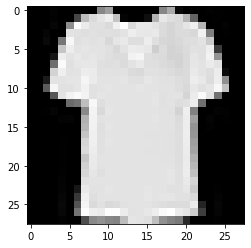

In [2]:
data = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = data.load_data()

plt.imshow(X_train[59987], cmap = 'gray')
plt.show

X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

#creates classes for loss function

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

class_names = ["Top", "Trousser", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker", "Bag"]



initilize model

In [3]:
classifier = Sequential()

classifier.add(Dense(units = 128, use_bias = True, bias_initializer='zeros', input_shape = (784, ), activation='relu'))
classifier.add(Dense(128, use_bias=True, bias_initializer='zeros', activation='relu'))
classifier.add(Dense(10, activation='softmax'))

compile model(loss and optimizer)

In [4]:
classifier.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=.1, momentum= 0.04), loss = 'categorical_crossentropy', metrics= ['accuracy'])

Train model

In [5]:
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 5)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.7671
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.8391
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8574
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3671 - accuracy: 0.8659
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3476 - accuracy: 0.8739


In [6]:
score = classifier.evaluate(X_test, Y_test)
print('loss: acc: ', score)

313/313 [==============================] - 0s 972us/step - loss: 0.4198 - accuracy: 0.8521
loss: acc:  [0.4198247492313385, 0.8521000146865845]
